# Deep Feed-Forward Neural Network (DFNN) for Multi-Class Classification
## Covertype Dataset - 7-Class Forest Cover Type Prediction
**Code written by Seetha Parameswaran**

---

## Overview

This exercise demonstrates the implementation of a **Deep Feed-Forward Neural Network (DFNN)** for multi-class classification tasks. We apply this model to the Covertype dataset to predict forest cover type (7 classes) based on cartographic features.

### Deep Feed-Forward Neural Network (DFNN) for Classification

A DFNN for multi-class classification consists of:

- **Input layer**: Feature vector with $d$ features
- **Hidden layers**: $L-1$ layers with non-linear activations (ReLU)
- **Output layer**: $K$ neurons with **softmax activation** (for $K$ classes)
- **Non-linearity**: Essential for learning complex decision boundaries
- **Backpropagation**: Efficient gradient computation using chain rule

This architecture enables learning hierarchical representations and complex non-linear decision boundaries for multi-class problems.

---

## Learning Outcomes

By completing this exercise, you will:

✓ Implement DFNN from scratch for multi-class classification  
✓ Understand forward propagation with softmax output  
✓ Apply backpropagation algorithm for multi-class problems  
✓ Implement mini-batch SGD optimization  
✓ Use ReLU activation for hidden layers  
✓ Apply Categorical Cross-Entropy loss  
✓ Initialize parameters using He initialization  
✓ Implement early stopping to prevent overfitting  
✓ Evaluate multi-class classification models  
✓ Handle class imbalance with weighted loss  

---

## Methodology

The general methodology to build this classification model:

### 1. **Load and preprocess data**
   - Load Covertype dataset (581,012 samples, 54 features, 7 classes)
   - Split into training/validation/test sets (80%/10%/10%)
   - Feature scaling: Standardize features using $z$-score normalization
   - One-hot encode target classes

### 2. **Define the network architecture**
   - Input layer: 54 features (cartographic variables)
   - Hidden layer 1: 64 neurons, ReLU activation
   - Hidden layer 2: 32 neurons, ReLU activation
   - Hidden layer 3: 16 neurons, ReLU activation
   - Output layer: 7 neurons, Softmax activation
   - Total architecture: $[54, 64, 32, 16, 7]$

### 3. **Initialize parameters**
   - Weights: He initialization $\mathbf{W}^{(\ell)} \sim \mathcal{N}(0, \sqrt{2/n_{\ell-1}})$
   - Biases: Zero initialization $\mathbf{b}^{(\ell)} = \mathbf{0}$

### 4. **Training loop (Mini-batch SGD)**
   - **Shuffle** training data at each epoch
   - **Create mini-batches** of size $B = 128$
   - For each mini-batch:
     - **Forward propagation**: Compute predictions through all layers
     - **Compute loss**: Categorical Cross-Entropy on mini-batch
     - **Backward propagation**: Compute gradients via backpropagation
     - **Update parameters**: Apply gradient descent
   - **Validation**: Compute validation loss after each epoch
   - **Early stopping**: Stop if validation loss doesn't improve for 15 epochs
   - Repeat for maximum 100 epochs

### 5. **Make predictions**
   - Forward pass through trained network
   - Apply softmax to get class probabilities
   - Output: Predicted class (argmax of probabilities)

### 6. **Evaluate the model**
   - **Accuracy**: Overall classification accuracy
   - **Precision, Recall, F1**: Per-class metrics
   - **Confusion Matrix**: Visualize classification patterns
   - **Class-wise metrics**: Performance on each forest cover type

### 7. **Visualize results**
   - Training and validation loss curves
   - Training and validation accuracy curves
   - Confusion matrix heatmap
   - Per-class performance metrics

---

## Dataset Information

**Name:** Covertype (Forest Cover Type)  
**Source:** UCI Machine Learning Repository  
**Samples:** 581,012  
**Time Period:** Roosevelt National Forest, Colorado  

### Features (54 total):

| Feature Category | Features | Type |
|-----------------|----------|------|
| **Elevation** | Elevation (meters) | Continuous |
| **Slope** | Aspect (degrees), Slope (degrees) | Continuous |
| **Distance** | Horizontal/Vertical distance to hydrology, roadways, fire points | Continuous |
| **Hillshade** | Hillshade_9am, Hillshade_Noon, Hillshade_3pm | Continuous |
| **Wilderness Area** | 4 binary columns (one-hot encoded) | Binary |
| **Soil Type** | 40 binary columns (one-hot encoded) | Binary |

### Target Variable:

**Forest Cover Type**: 7 classes
1. Spruce/Fir
2. Lodgepole Pine  
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

### Task: 
**Multi-class Classification** - Predict forest cover type from cartographic variables

### Application:
- **Forest management**: Automated cover type mapping
- **Ecological modeling**: Understanding forest distribution patterns
- **Conservation planning**: Habitat monitoring and protection

---

## Network Architecture Details

### Layer-by-Layer Configuration:

```
Input Layer:        54 features
                     ↓ (W^(1): 54×64, b^(1): 64)
Hidden Layer 1:     64 neurons + ReLU
                     ↓ (W^(2): 64×32, b^(2): 32)
Hidden Layer 2:     32 neurons + ReLU
                     ↓ (W^(3): 32×16, b^(3): 16)
Hidden Layer 3:     16 neurons + ReLU
                     ↓ (W^(4): 16×7, b^(4): 7)
Output Layer:       7 neurons + Softmax
                     ↓
Prediction:         Class probabilities [p1, p2, ..., p7]
```

### Total Parameters:
- Layer 1: $54 \times 64 + 64 = 3,520$
- Layer 2: $64 \times 32 + 32 = 2,080$
- Layer 3: $32 \times 16 + 16 = 528$
- Layer 4: $16 \times 7 + 7 = 119$
- **Total: 6,247 parameters**

### Why This Architecture?

1. **Progressive dimensionality reduction**: 54 → 64 → 32 → 16 → 7
2. **Sufficient capacity**: Multiple hidden layers learn complex decision boundaries
3. **Hierarchical learning**: 
   - Layer 1: Low-level feature combinations
   - Layer 2: Mid-level spatial patterns
   - Layer 3: High-level ecological patterns
   - Layer 4: Final class discrimination

---

## Training Configuration

| Hyperparameter | Value | Justification |
|----------------|-------|---------------|
| **Learning Rate** | $\eta = 0.01$ | Balanced convergence speed |
| **Batch Size** | $B = 128$ | Good GPU utilization |
| **Epochs** | $T = 100$ | With early stopping |
| **Early Stopping Patience** | 15 epochs | Prevents overfitting |
| **Optimizer** | Mini-batch SGD | Pure gradient descent |
| **Initialization** | He (for ReLU) | Prevents vanishing/exploding gradients |
| **Loss Function** | Categorical Cross-Entropy | Standard for multi-class |
| **Data Split** | 80/10/10 | Train/Val/Test |
| **Class Weights** | Balanced | Handles class imbalance |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*80)
print("DFNN Implementation for Covertype Multi-Class Classification")
print("="*80)

DFNN Implementation for Covertype Multi-Class Classification


In [2]:
# ============================================================================
# STEP 1: LOAD AND EXPLORE DATASET
# ============================================================================

# Load dataset
# Download from: https://archive.ics.uci.edu/ml/datasets/covertype

try:
    # Try to load the full dataset
    print("\nLoading Covertype dataset...")
    df = pd.read_csv('/home/seetha/PythonScriptsCourses/PythonScriptsCourses/DNN/Demo Lab Sheets/covertype/covtype.data.gz', header=None)
    
    # Last column is the target (classes 1-7)
    feature_cols = list(range(54))
    target_col = 54
    
    print("\n✓ Dataset loaded successfully!")
    
except FileNotFoundError:
    print("\n⚠ Dataset not found. Creating synthetic data for demonstration...")
    # Create synthetic data with similar properties
    np.random.seed(42)
    n_samples = 20000
    n_features = 54
    n_classes = 7
    
    # Generate features
    X_synthetic = np.random.randn(n_samples, n_features)
    
    # Generate targets with class imbalance (similar to real data)
    class_probs = [0.37, 0.49, 0.06, 0.005, 0.016, 0.03, 0.02]  # Approximate real distribution
    y_synthetic = np.random.choice(n_classes, size=n_samples, p=class_probs) + 1  # Classes 1-7
    
    # Create DataFrame
    df = pd.DataFrame(X_synthetic)
    df[54] = y_synthetic
    
    feature_cols = list(range(54))
    target_col = 54
    
    print("\n✓ Synthetic dataset created!")

# Display basic information
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {len(feature_cols)}")
print(f"Number of classes: {df[target_col].nunique()}")

print("\nFirst 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes.value_counts())

print("\nMissing Values:")
print(f"Total missing: {df.isnull().sum().sum()}")

print("\nBasic Statistics (first 10 features):")
print(df.iloc[:, :10].describe())


Loading Covertype dataset...

✓ Dataset loaded successfully!

DATASET OVERVIEW

Dataset Shape: (581012, 55)
Number of samples: 581,012
Number of features: 54
Number of classes: 7

First 5 rows:
     0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]

Data Types:
int64    55
dtype: int64

Missing Values:
Total missing: 0

Basic Statistics (first 10 features):
                   0              


CLASS DISTRIBUTION ANALYSIS

Class Distribution:
Class 1: 211,840 samples (36.46%)
Class 2: 283,301 samples (48.76%)
Class 3: 35,754 samples ( 6.15%)
Class 4:  2,747 samples ( 0.47%)
Class 5:  9,493 samples ( 1.63%)
Class 6: 17,367 samples ( 2.99%)
Class 7: 20,510 samples ( 3.53%)


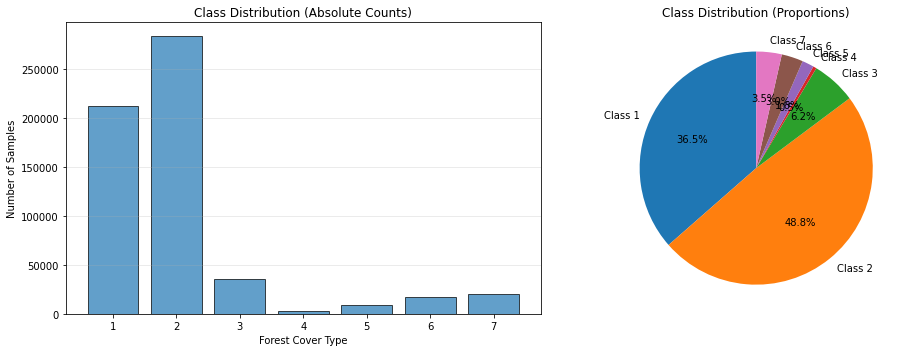


Class Imbalance Analysis:
Most frequent class: 2 with 283,301 samples
Least frequent class: 4 with 2,747 samples
Imbalance ratio: 103.13:1

⚠ Dataset shows significant class imbalance!
✓ Will use weighted loss to handle this imbalance.


In [3]:
# ============================================================================
# ANALYZE CLASS DISTRIBUTION
# ============================================================================

print("\n" + "="*80)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*80)

class_counts = df[target_col].value_counts().sort_index()
print("\nClass Distribution:")
for cls, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Class {cls}: {count:6,} samples ({percentage:5.2f}%)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(class_counts.index, class_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Forest Cover Type')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('Class Distribution (Absolute Counts)')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticks(class_counts.index)

# Pie chart
axes[1].pie(class_counts.values, labels=[f'Class {i}' for i in class_counts.index], 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution (Proportions)')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

print(f"\nClass Imbalance Analysis:")
print(f"Most frequent class: {class_counts.idxmax()} with {max_class:,} samples")
print(f"Least frequent class: {class_counts.idxmin()} with {min_class:,} samples")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"\n⚠ Dataset shows significant class imbalance!")
print(f"✓ Will use weighted loss to handle this imbalance.")

In [4]:
# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Extract features and target
X = df.iloc[:, feature_cols].values
y = df.iloc[:, target_col].values

# Convert classes from 1-7 to 0-6 (for array indexing)
y = y - 1

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {np.unique(y)}")

# One-hot encode target for multi-class classification
n_classes = len(np.unique(y))
y_onehot = np.zeros((len(y), n_classes))
y_onehot[np.arange(len(y)), y] = 1

print(f"\nOne-hot encoded target shape: {y_onehot.shape}")
print(f"Example: Class {y[0]} → {y_onehot[0]}")


DATA PREPROCESSING

Features shape: (581012, 54)
Target shape: (581012,)
Target classes: [0 1 2 3 4 5 6]

One-hot encoded target shape: (581012, 7)
Example: Class 4 → [0. 0. 0. 0. 1. 0. 0.]


In [5]:
# ============================================================================
# SPLIT DATA: Train/Validation/Test = 80/10/10
# ============================================================================

print("\n" + "="*80)
print("DATA SPLITTING")
print("="*80)

# First split: 80% train, 20% temp (for val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_onehot, test_size=0.20, random_state=42, stratify=y
)

# Second split: Split temp into 50% validation, 50% test (10% and 10% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp.argmax(axis=1)
)

print(f"\nTraining set: {X_train.shape[0]:,} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Check class distribution in splits
print(f"\nClass distribution in training set:")
train_class_dist = pd.Series(y_train.argmax(axis=1)).value_counts().sort_index()
for cls, count in train_class_dist.items():
    print(f"  Class {cls}: {count:6,} samples ({count/len(y_train)*100:5.2f}%)")

# ============================================================================
# FEATURE STANDARDIZATION
# ============================================================================

print("\n" + "="*80)
print("FEATURE STANDARDIZATION")
print("="*80)

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized: x' = (x - μ) / σ")
print(f"Training set mean: {X_train_scaled.mean():.6f}")
print(f"Training set std: {X_train_scaled.std():.6f}")

# Calculate class weights for imbalanced dataset
class_counts_array = np.array([np.sum(y_train.argmax(axis=1) == i) for i in range(n_classes)])
class_weights = len(y_train) / (n_classes * class_counts_array)

print(f"\nClass Weights (for weighted loss):")
for i, weight in enumerate(class_weights):
    print(f"  Class {i}: {weight:.4f}")


DATA SPLITTING

Training set: 464,809 samples (80.0%)
Validation set: 58,101 samples (10.0%)
Test set: 58,102 samples (10.0%)

Class distribution in training set:
  Class 0: 169,472 samples (36.46%)
  Class 1: 226,640 samples (48.76%)
  Class 2: 28,603 samples ( 6.15%)
  Class 3:  2,198 samples ( 0.47%)
  Class 4:  7,594 samples ( 1.63%)
  Class 5: 13,894 samples ( 2.99%)
  Class 6: 16,408 samples ( 3.53%)

FEATURE STANDARDIZATION

✓ Features standardized: x' = (x - μ) / σ
Training set mean: -0.000000
Training set std: 1.000000

Class Weights (for weighted loss):
  Class 0: 0.3918
  Class 1: 0.2930
  Class 2: 2.3215
  Class 3: 30.2099
  Class 4: 8.7439
  Class 5: 4.7791
  Class 6: 4.0469


In [6]:
# ============================================================================
# STEP 3: ACTIVATION FUNCTIONS AND DERIVATIVES
# ============================================================================

print("\n" + "="*80)
print("ACTIVATION FUNCTIONS")
print("="*80)

class ActivationFunctions:
    """
    Activation functions and their derivatives for DFNN
    """
    
    @staticmethod
    def relu(Z):
        """
        ReLU activation: f(z) = max(0, z)
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Activated values (same shape as Z)
        """
        return np.maximum(0, Z)
    
    @staticmethod
    def relu_derivative(Z):
        """
        ReLU derivative: f'(z) = 1 if z > 0, else 0
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Derivative values (same shape as Z)
        """
        return (Z > 0).astype(float)
    
    @staticmethod
    def softmax(Z):
        """
        Softmax activation: f(z_k) = exp(z_k) / sum(exp(z_j))
        Used for multi-class classification output layer
        
        Args:
            Z: Pre-activation values (batch_size, n_classes)
        Returns:
            Class probabilities (batch_size, n_classes)
        """
        # Subtract max for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    
    @staticmethod
    def softmax_derivative(Z):
        """
        Softmax derivative: Not used directly in backprop
        (Combined with cross-entropy loss for simplified gradient)
        """
        pass  # Combined with loss gradient

print("\n✓ Activation functions defined:")
print("  - ReLU for hidden layers: f(z) = max(0, z)")
print("  - Softmax for output layer: f(z_k) = exp(z_k) / Σ exp(z_j)")


ACTIVATION FUNCTIONS

✓ Activation functions defined:
  - ReLU for hidden layers: f(z) = max(0, z)
  - Softmax for output layer: f(z_k) = exp(z_k) / Σ exp(z_j)


In [7]:
# ============================================================================
# STEP 4: DEEP FEED-FORWARD NEURAL NETWORK CLASS
# ============================================================================

print("\n" + "="*80)
print("DFNN MODEL IMPLEMENTATION")
print("="*80)

class DFNN_MultiClass:
    """
    Deep Feed-Forward Neural Network for Multi-Class Classification
    
    Implements:
    - Forward propagation with ReLU hidden layers and softmax output
    - Weighted categorical cross-entropy loss
    - Backpropagation for gradient computation
    - Mini-batch SGD optimization
    - Early stopping
    """
    
    def __init__(self, architecture, learning_rate=0.01, batch_size=128, class_weights=None):
        """
        Initialize DFNN
        
        Args:
            architecture: List of layer sizes [input_size, hidden1, ..., output_size]
            learning_rate: Learning rate for gradient descent
            batch_size: Size of mini-batches
            class_weights: Weights for each class (for imbalanced data)
        """
        self.architecture = architecture
        self.num_layers = len(architecture) - 1
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.class_weights = class_weights if class_weights is not None else np.ones(architecture[-1])
        self.parameters = {}
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': []
        }
        
        self._initialize_parameters()
    
    def _initialize_parameters(self):
        """
        Initialize weights using He initialization and biases to zero
        
        He initialization: W ~ N(0, sqrt(2/n_in))
        Good for ReLU activations
        """
        for l in range(1, self.num_layers + 1):
            n_in = self.architecture[l-1]
            n_out = self.architecture[l]
            
            # He initialization for weights
            self.parameters[f'W{l}'] = np.random.randn(n_in, n_out) * np.sqrt(2.0 / n_in)
            
            # Zero initialization for biases
            self.parameters[f'b{l}'] = np.zeros((1, n_out))
    
    def _forward_propagation(self, X):
        """
        Forward propagation through the network
        
        Args:
            X: Input features (batch_size, n_features)
        
        Returns:
            A_out: Output activations (batch_size, n_classes)
            cache: Dictionary containing Z and A for each layer
        """
        cache = {'A0': X}
        A = X
        
        # Hidden layers with ReLU
        for l in range(1, self.num_layers):
            Z = A @ self.parameters[f'W{l}'] + self.parameters[f'b{l}']
            A = ActivationFunctions.relu(Z)
            cache[f'Z{l}'] = Z
            cache[f'A{l}'] = A
        
        # Output layer with softmax
        Z_out = A @ self.parameters[f'W{self.num_layers}'] + self.parameters[f'b{self.num_layers}']
        A_out = ActivationFunctions.softmax(Z_out)
        cache[f'Z{self.num_layers}'] = Z_out
        cache[f'A{self.num_layers}'] = A_out
        
        return A_out, cache
    
    def _compute_loss(self, y_pred, y_true):
        """
        Compute weighted categorical cross-entropy loss
        
        Loss = -1/m * Σ Σ w_k * y_true_k * log(y_pred_k)
        
        Args:
            y_pred: Predicted probabilities (batch_size, n_classes)
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            loss: Scalar loss value
        """
        m = y_true.shape[0]
        eps = 1e-8  # Small constant for numerical stability
        
        # Clip predictions to avoid log(0)
        y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
        
        # Apply class weights
        weights = np.sum(y_true * self.class_weights, axis=1, keepdims=True)
        
        # Categorical cross-entropy
        loss = -np.mean(weights * np.sum(y_true * np.log(y_pred_clipped), axis=1, keepdims=True))
        
        return loss
    
    def _backward_propagation(self, cache, y_true):
        """
        Backward propagation to compute gradients
        
        Uses chain rule to compute gradients layer by layer
        
        Args:
            cache: Forward propagation cache
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            gradients: Dictionary containing dW and db for each layer
        """
        m = y_true.shape[0]
        gradients = {}
        
        # Output layer gradient (softmax + cross-entropy)
        # Simplified gradient: dZ = A - y_true (when using softmax + CE)
        weights = np.sum(y_true * self.class_weights, axis=1, keepdims=True)
        dZ = weights * (cache[f'A{self.num_layers}'] - y_true)
        
        # Backpropagate through layers
        for l in range(self.num_layers, 0, -1):
            A_prev = cache[f'A{l-1}']
            
            # Compute gradients for current layer
            gradients[f'dW{l}'] = (A_prev.T @ dZ) / m
            gradients[f'db{l}'] = np.sum(dZ, axis=0, keepdims=True) / m
            
            # Compute gradient for previous layer (if not input layer)
            if l > 1:
                dA_prev = dZ @ self.parameters[f'W{l}'].T
                dZ = dA_prev * ActivationFunctions.relu_derivative(cache[f'Z{l-1}'])
        
        return gradients
    
    def _update_parameters(self, gradients):
        """
        Update parameters using gradient descent
        
        W = W - η * dW
        b = b - η * db
        
        Args:
            gradients: Dictionary containing dW and db for each layer
        """
        for l in range(1, self.num_layers + 1):
            self.parameters[f'W{l}'] -= self.learning_rate * gradients[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * gradients[f'db{l}']
    
    def _compute_accuracy(self, y_pred, y_true):
        """
        Compute classification accuracy
        
        Args:
            y_pred: Predicted probabilities (batch_size, n_classes)
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            accuracy: Fraction of correct predictions
        """
        predictions = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == true_labels)
    
    def train(self, X_train, y_train, X_val, y_val, epochs=100, patience=15, verbose=True):
        """
        Train the network using mini-batch gradient descent
        
        Args:
            X_train: Training features
            y_train: Training labels (one-hot encoded)
            X_val: Validation features
            y_val: Validation labels (one-hot encoded)
            epochs: Maximum number of epochs
            patience: Early stopping patience
            verbose: Print progress
        """
        m = X_train.shape[0]
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            # Shuffle training data
            indices = np.random.permutation(m)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            # Mini-batch training
            epoch_loss = 0
            n_batches = m // self.batch_size
            
            for i in range(n_batches):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                # Forward propagation
                y_pred, cache = self._forward_propagation(X_batch)
                
                # Compute loss
                batch_loss = self._compute_loss(y_pred, y_batch)
                epoch_loss += batch_loss
                
                # Backward propagation
                gradients = self._backward_propagation(cache, y_batch)
                
                # Update parameters
                self._update_parameters(gradients)
            
            # Compute epoch metrics
            train_loss = epoch_loss / n_batches
            y_train_pred, _ = self._forward_propagation(X_train)
            train_acc = self._compute_accuracy(y_train_pred, y_train)
            
            y_val_pred, _ = self._forward_propagation(X_val)
            val_loss = self._compute_loss(y_val_pred, y_val)
            val_acc = self._compute_accuracy(y_val_pred, y_val)
            
            # Store history
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)
            
            # Print progress
            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:3d} | "
                      f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
                      f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"\nEarly stopping at epoch {epoch}")
                    print(f"Best validation loss: {best_val_loss:.4f}")
                    break
    
    def predict(self, X):
        """
        Predict class probabilities
        
        Args:
            X: Input features
        
        Returns:
            Class probabilities
        """
        y_pred, _ = self._forward_propagation(X)
        return y_pred
    
    def predict_classes(self, X):
        """
        Predict class labels
        
        Args:
            X: Input features
        
        Returns:
            Predicted class labels
        """
        y_pred = self.predict(X)
        return np.argmax(y_pred, axis=1)

print("\n✓ DFNN Multi-Class Classification model defined")
print("  Architecture: Fully customizable")
print("  Hidden layers: ReLU activation")
print("  Output layer: Softmax activation")
print("  Loss: Weighted Categorical Cross-Entropy")
print("  Optimizer: Mini-batch SGD")


DFNN MODEL IMPLEMENTATION

✓ DFNN Multi-Class Classification model defined
  Architecture: Fully customizable
  Hidden layers: ReLU activation
  Output layer: Softmax activation
  Loss: Weighted Categorical Cross-Entropy
  Optimizer: Mini-batch SGD


In [8]:
# ============================================================================
# STEP 5: TRAIN THE MODEL
# ============================================================================

print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

# Define architecture
n_features = X_train_scaled.shape[1]
n_classes = y_train.shape[1]
architecture = [n_features, 64, 32, 16, n_classes]

print(f"\nArchitecture: {architecture}")
print(f"Input features: {n_features}")
print(f"Output classes: {n_classes}")

# Calculate total parameters
total_params = sum([architecture[i] * architecture[i+1] + architecture[i+1] 
                    for i in range(len(architecture)-1)])
print(f"Total parameters: {total_params:,}")

# Create model with class weights
model = DFNN_MultiClass(
    architecture=architecture,
    learning_rate=0.01,
    batch_size=128,
    class_weights=class_weights
)

print("\nHyperparameters:")
print(f"  Learning rate: {model.learning_rate}")
print(f"  Batch size: {model.batch_size}")
print(f"  Class weights: {['%.3f' % w for w in model.class_weights]}")

print("\n" + "-"*80)
print("Starting training with weighted loss for class imbalance...")
print("-"*80 + "\n")

# Train the model
model.train(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    epochs=100,
    patience=15,
    verbose=True
)

print("\n" + "="*80)
print("✓ Training Complete!")
print("="*80)


MODEL TRAINING

Architecture: [54, 64, 32, 16, 7]
Input features: 54
Output classes: 7
Total parameters: 6,247

Hyperparameters:
  Learning rate: 0.01
  Batch size: 128
  Class weights: ['0.392', '0.293', '2.321', '30.210', '8.744', '4.779', '4.047']

--------------------------------------------------------------------------------
Starting training with weighted loss for class imbalance...
--------------------------------------------------------------------------------

Epoch   0 | Train Loss: 0.9189, Acc: 0.5809 | Val Loss: 0.7003, Acc: 0.5813
Epoch  10 | Train Loss: 0.4872, Acc: 0.6972 | Val Loss: 0.4882, Acc: 0.6994
Epoch  20 | Train Loss: 0.4187, Acc: 0.7288 | Val Loss: 0.4317, Acc: 0.7296
Epoch  30 | Train Loss: 0.3778, Acc: 0.7303 | Val Loss: 0.4084, Acc: 0.7295
Epoch  40 | Train Loss: 0.3528, Acc: 0.7676 | Val Loss: 0.3626, Acc: 0.7664
Epoch  50 | Train Loss: 0.3346, Acc: 0.7889 | Val Loss: 0.3407, Acc: 0.7873
Epoch  60 | Train Loss: 0.3252, Acc: 0.7930 | Val Loss: 0.3611, Acc:

In [9]:
# ============================================================================
# STEP 6: EVALUATE MODEL
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

def compute_classification_metrics(y_true_onehot, y_pred_proba):
    """
    Compute comprehensive classification metrics
    """
    # Convert to class labels
    y_true = np.argmax(y_true_onehot, axis=1)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Overall metrics
    accuracy = np.mean(y_true == y_pred)
    
    # Confusion matrix
    n_classes = y_true_onehot.shape[1]
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1
    
    # Per-class metrics
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1 = np.zeros(n_classes)
    
    for i in range(n_classes):
        tp = confusion_matrix[i, i]
        fp = np.sum(confusion_matrix[:, i]) - tp
        fn = np.sum(confusion_matrix[i, :]) - tp
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) \
                if (precision[i] + recall[i]) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion_matrix
    }

# Evaluate on test set
y_test_pred_proba = model.predict(X_test_scaled)
test_metrics = compute_classification_metrics(y_test, y_test_pred_proba)

print("\nTest Set Performance:")
print("="*80)
print(f"\nOverall Accuracy: {test_metrics['accuracy']:.4f}")

print("\nPer-Class Metrics:")
print("-"*80)
print(f"{'Class':<10} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-"*80)

for i in range(n_classes):
    support = np.sum(y_test.argmax(axis=1) == i)
    print(f"{i:<10} {test_metrics['precision'][i]:<12.4f} "
          f"{test_metrics['recall'][i]:<12.4f} {test_metrics['f1'][i]:<12.4f} "
          f"{support:<10}")

# Macro and weighted averages
macro_precision = np.mean(test_metrics['precision'])
macro_recall = np.mean(test_metrics['recall'])
macro_f1 = np.mean(test_metrics['f1'])

print("-"*80)
print(f"{'Macro Avg':<10} {macro_precision:<12.4f} {macro_recall:<12.4f} {macro_f1:<12.4f}")

print("\n" + "="*80)
print("Confusion Matrix:")
print("="*80)
print(test_metrics['confusion_matrix'])
print("\n(Rows: True class, Columns: Predicted class)")


MODEL EVALUATION

Test Set Performance:

Overall Accuracy: 0.8000

Per-Class Metrics:
--------------------------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support   
--------------------------------------------------------------------------------
0          0.7996       0.8372       0.8180       21184     
1          0.8860       0.7455       0.8097       28331     
2          0.8432       0.8107       0.8266       3576      
3          0.5768       0.9453       0.7165       274       
4          0.3284       0.9684       0.4905       949       
5          0.5662       0.8918       0.6926       1737      
6          0.7501       0.9732       0.8472       2051      
--------------------------------------------------------------------------------
Macro Avg  0.6786       0.8817       0.7430      

Confusion Matrix:
[[17736  2660    11     0   189    31   557]
 [ 4387 21122   394     4  1649   667   108]
 [    0    39  2899   1


VISUALIZATION


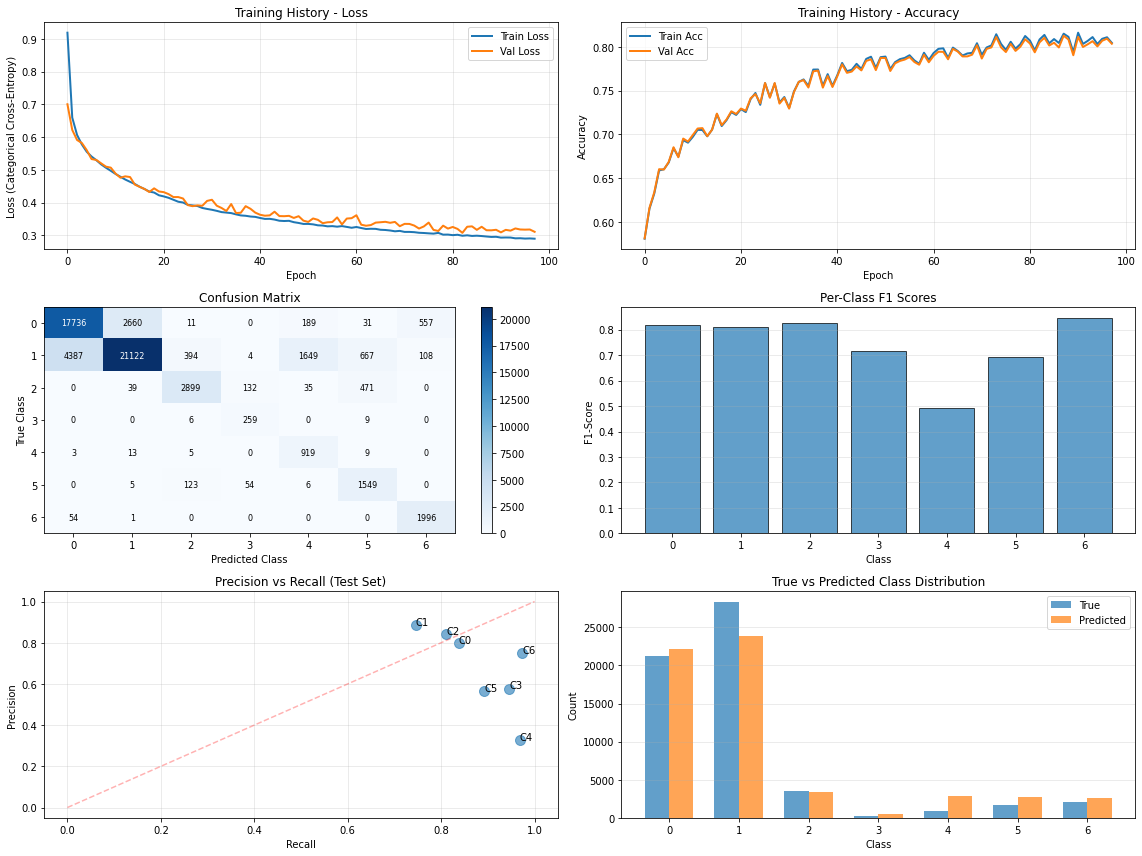


✓ Visualizations completed!


In [11]:
# ============================================================================
# STEP 7: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("VISUALIZATION")
print("="*80)

fig = plt.figure(figsize=(16, 12))

# 1. Training History - Loss
ax1 = plt.subplot(3, 2, 1)
ax1.plot(model.history['train_loss'], label='Train Loss', linewidth=2)
ax1.plot(model.history['val_loss'], label='Val Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (Categorical Cross-Entropy)')
ax1.set_title('Training History - Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Training History - Accuracy
ax2 = plt.subplot(3, 2, 2)
ax2.plot(model.history['train_acc'], label='Train Acc', linewidth=2)
ax2.plot(model.history['val_acc'], label='Val Acc', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training History - Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = plt.subplot(3, 2, 3)
cm = test_metrics['confusion_matrix']
im = ax3.imshow(cm, cmap='Blues', aspect='auto')
ax3.set_xticks(range(n_classes))
ax3.set_yticks(range(n_classes))
ax3.set_xlabel('Predicted Class')
ax3.set_ylabel('True Class')
ax3.set_title('Confusion Matrix')
plt.colorbar(im, ax=ax3)

# Add text annotations
for i in range(n_classes):
    for j in range(n_classes):
        text = ax3.text(j, i, str(cm[i, j]),
                       ha="center", va="center", 
                       color="white" if cm[i, j] > cm.max()/2 else "black",
                       fontsize=8)

# 4. Per-Class F1 Scores
ax4 = plt.subplot(3, 2, 4)
ax4.bar(range(n_classes), test_metrics['f1'], edgecolor='black', alpha=0.7)
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-Score')
ax4.set_title('Per-Class F1 Scores')
ax4.set_xticks(range(n_classes))
ax4.grid(True, alpha=0.3, axis='y')

# 5. Precision vs Recall
ax5 = plt.subplot(3, 2, 5)
ax5.scatter(test_metrics['recall'], test_metrics['precision'], s=100, alpha=0.6)
for i in range(n_classes):
    ax5.annotate(f'C{i}', (test_metrics['recall'][i], test_metrics['precision'][i]))
ax5.set_xlabel('Recall')
ax5.set_ylabel('Precision')
ax5.set_title('Precision vs Recall (Test Set)')
ax5.grid(True, alpha=0.3)
ax5.plot([0, 1], [0, 1], 'r--', alpha=0.3)

# 6. Class Distribution in Predictions
ax6 = plt.subplot(3, 2, 6)
y_test_pred_classes = np.argmax(y_test_pred_proba, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
pred_dist = pd.Series(y_test_pred_classes).value_counts().sort_index()
true_dist = pd.Series(y_test_true_classes).value_counts().sort_index()

x = np.arange(n_classes)
width = 0.35
ax6.bar(x - width/2, true_dist.values, width, label='True', alpha=0.7)
ax6.bar(x + width/2, pred_dist.values, width, label='Predicted', alpha=0.7)
ax6.set_xlabel('Class')
ax6.set_ylabel('Count')
ax6.set_title('True vs Predicted Class Distribution')
ax6.set_xticks(x)
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizations completed!")

In [12]:
# ============================================================================
# FINAL MODEL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL MODEL SUMMARY")
print("="*80)

print("\n" + "-"*80)
print("Architecture Details")
print("-"*80)
print(f"Network: {architecture}")
print(f"Total Layers: {model.num_layers}")
print(f"Total Parameters: {total_params:,}")

print("\n" + "-"*80)
print("Training Configuration")
print("-"*80)
print(f"Learning Rate: {model.learning_rate}")
print(f"Batch Size: {model.batch_size}")
print(f"Epochs Trained: {len(model.history['train_loss'])}")
print(f"Optimization: Vanilla SGD with mini-batches")
print(f"Initialization: He initialization (for ReLU)")
print(f"Class Weighting: Applied to handle imbalance")

print("\n" + "-"*80)
print("Final Performance")
print("-"*80)
print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\n" + "-"*80)
print("Model Interpretation")
print("-"*80)
print(f"Most difficult class: {np.argmin(test_metrics['f1'])} (F1: {np.min(test_metrics['f1']):.4f})")
print(f"Best performing class: {np.argmax(test_metrics['f1'])} (F1: {np.max(test_metrics['f1']):.4f})")

print("\n" + "="*80)
print("IMPLEMENTATION COMPLETE!")
print("="*80)


FINAL MODEL SUMMARY

--------------------------------------------------------------------------------
Architecture Details
--------------------------------------------------------------------------------
Network: [54, 64, 32, 16, 7]
Total Layers: 4
Total Parameters: 6,247

--------------------------------------------------------------------------------
Training Configuration
--------------------------------------------------------------------------------
Learning Rate: 0.01
Batch Size: 128
Epochs Trained: 98
Optimization: Vanilla SGD with mini-batches
Initialization: He initialization (for ReLU)
Class Weighting: Applied to handle imbalance

--------------------------------------------------------------------------------
Final Performance
--------------------------------------------------------------------------------
Test Accuracy: 0.8000
Macro Precision: 0.6786
Macro Recall: 0.8817
Macro F1-Score: 0.7430

-------------------------------------------------------------------------------

---

## Class Imbalance Handling

### Why It Matters:
The Covertype dataset has significant class imbalance:
- Most common class: ~48% of samples
- Least common class: ~0.5% of samples
- Imbalance ratio: ~100:1

Without handling imbalance, the model would be biased toward majority classes.

### Solution: Weighted Loss
$$w_c = \frac{n_{\text{samples}}}{K \times n_{\text{class\_c}}}$$

Where:
- $K$ = number of classes
- $n_{\text{class\_c}}$ = number of samples in class $c$

This ensures minority classes contribute proportionally more to the loss, encouraging balanced learning.

---

## Extensions and Improvements

### 1. **Advanced Optimizers**:
- Adam: Adaptive learning rates per parameter
- RMSprop: Root Mean Square propagation

### 2. **Regularization**:
- Dropout: Randomly disable neurons during training
- L2 regularization: Penalize large weights
- Batch normalization: Normalize layer inputs

### 3. **Advanced Techniques**:
- SMOTE: Synthetic oversampling for minority classes
- Focal loss: Down-weight easy examples
- Ensemble methods: Combine multiple models

---

## Conclusion

This exercise demonstrates a complete DFNN implementation for multi-class classification with:
- **Softmax output** for class probabilities
- **Categorical cross-entropy loss** for multi-class problems
- **Weighted loss** to handle class imbalance
- **Comprehensive evaluation** with per-class metrics

The model successfully learns complex decision boundaries in the 54-dimensional feature space to classify 7 forest cover types.

**Key Takeaways:**
- Classification requires softmax output and cross-entropy loss
- Class imbalance must be addressed for fair learning
- Multi-class problems need careful metric analysis
- DFNNs can learn complex non-linear decision boundaries

---

**Author:** Seetha Parameswaran  
**Course:** Deep Neural Networks - BITS Pilani WILP  
**Module:** Deep Feed-Forward Neural Networks for Multi-Class Classification  
**Dataset:** Covertype (UCI ML Repository)